##Pengumpulan dan Pembersihan Data

In [ ]:
# Mengimpor library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

# Mount Google Drive untuk membaca dataset
from google.colab import drive
drive.mount('/content/drive')

# Membaca dataset
df = pd.read_csv('/content/drive/MyDrive/RegresiUTSTelkom.csv')

# Melihat data teratas
df.head()

# Cek info tentang data (tipe data dan jumlah data null)
df.info()

# Menghapus nilai yang hilang (jika ada)
df = df.dropna()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515344 entries, 0 to 515343
Data columns (total 91 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   2001        515344 non-null  int64  
 1   49.94357    515344 non-null  float64
 2   21.47114    515344 non-null  float64
 3   73.0775     515344 non-null  float64
 4   8.74861     515344 non-null  float64
 5   -17.40628   515344 non-null  float64
 6   -13.09905   515344 non-null  float64
 7   -25.01202   515344 non-null  float64
 8   -12.23257   515344 non-null  float64
 9   7.83089     515344 non-null  float64
 10  -2.46783    515344 non-null  float64
 11  3.32136     515344 non-null  float64
 12  -2.31521    515344 non-null  float64
 13  10.20556    515344 non-null  float64
 14  611.10913   515344 non-null  float64
 15  951.0896    515344 non-null  float64
 16 

##Memisahkan Fitur dan Target

In [ ]:
# Memisahkan fitur dan target otomatis (mengasumsikan target ada di kolom terakhir)
X = df.iloc[:, :-1]  # Semua kolom kecuali kolom terakhir
y = df.iloc[:, -1]   # Kolom terakhir sebagai target

##Menggunakan Korelasi

In [ ]:
# Menampilkan korelasi antar fitur dan target
correlation_matrix = df.corr()

# Menampilkan korelasi fitur dengan target
print(correlation_matrix.iloc[:, -1].sort_values(ascending=False))  # Kolom terakhir adalah target

2.26327      1.000000
68.40795     0.249920
-1.82223     0.224785
-10.7366     0.202330
-27.46348    0.199018
               ...   
21.47114    -0.159893
40.14786    -0.161037
-5.90857    -0.164815
-7.26272    -0.176241
49.94357    -0.183505
Name: 2.26327, Length: 91, dtype: float64


##Feature Engineering

In [ ]:
# One-hot encoding untuk fitur kategorikal (jika ada)
X_encoded = pd.get_dummies(X, drop_first=True)

# Pembagian data menjadi training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

##Model Training dan Evaluasi

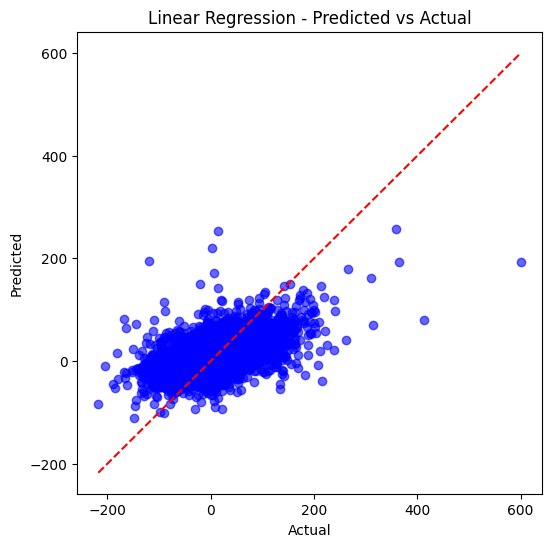

In [ ]:
# Daftar model untuk dilatih
models = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression': make_pipeline(PolynomialFeatures(degree=3), LinearRegression()),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Bagging Regressor': BaggingRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'SVR': SVR()
}

# Melatih dan mengevaluasi model
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Menghitung evaluasi model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MSE': mse, 'RMSE': rmse, 'R2': r2}

    # Menampilkan prediksi dan aktual
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.title(f'{name} - Predicted vs Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

# Menampilkan hasil evaluasi model
evaluation_df = pd.DataFrame(results).T
print(evaluation_df)

#**Penjelasan**

- MSE (Mean Squared Error)
Mengukur rata - rata kuadrat dari kesalahan prediksi. Semakin rendah MSE, semakin baik modelnya.
- RMSE (Root Mean squared Error)
memberikan ukuran yang lebih mudah diinterpretasikan karena berada pada satuan yang sama dengan target. RMSE yang lebih rendah menunjukkan model yang lebih baik.
- R² (R-Squared)
Mengukur proporsi variabilitas dalam data yang dapat dijelaskan oleh model. Nilai R² yang lebih tinggi menunjukkan bahwa model lebih baik dalam menjelaskan variabilitas data.

#**Analisis**

**1. Strategi Mengatasi Underfitting pada Linear Regression**
- **Transformasi Fitur**\
Menggunakan polynomial features atau logarithmic transformations pada fitur input untuk menangkap pola yang lebih rumit. Keuntungannya model dapat lebih baik dalam menangkap hubungan non-linear. Kelemahannya, jika tidak dipilih dengan tepat fitur baru dapat menyebabkan overfitting.
- **Penambahan Feature Engineering**\
Menyediakan informasi lebih bagi model untuk menangkap pola yang lebih rumit. Keuntungannya, model menjadi lebih rumit. Kelemahannya, dapat menambah kompleksitas data dan meningkatkan risiko overfitting.


**2. Alternatif Loss Function untuk Masalah Regresi**
- **MAE (Mean Absolute Error)**\
Mengukur rata-rata selisih absolut antara nilai prediksi dan nilai aktual. Keuntungannya, tidak terpengaruh oleh outliers karena tidak mengkuadratkan error, lebih stabil dan lebih mudah di interpretasikan. Kelemahannya, tidak memperhitungkan besarnya error.
- **Huber Loss**\
Untuk error kecil, Huber bertindak seperti MSE, dan untuk error besar, Huber bertindak seperti MAE. Keuntungannya, lebih tahan terhadap outliers dibandingkan MSE. Kelemahannya, menentukan parameter delta bisa sulit.

**3. Metode Mengukur Pentingnya Setiap Fitur dalam Model**
- **Koefisien Regresi untuk Model Linear**\
Fitur dengan koefisien lebih besar atau lebih kecil, tergantung pada tanda koefisien memiliki pengaruh yang lebih besar terhadap target. Keterbatasannya, tidak dapat menangkap hubungan non-linear dengan baik.
- **Feature Importance Berdasarkan Impurity Reduction untuk Model Tree-Based seperti Decision Tree atau Random Forest**\
Fitur ini lebih sering digunakan untuk membagi data. Keterbatasannya, model ini bisa memilih fitur yang lebih "terpisah" daripada fitur yang lebih informatif.

**4. Desain Eksperimen untuk Memilih Hyperparameter Optimal**
- **Grid Search**\
Mencoba berbagai kombinasi hyperparameter dalam grid yang ditentukan sebelumnya dan memilih kombinasi yang memberikan performa terbaik berdasarkan suatu metrik evaluasi. Keuntungannya menjamin bahwa semua kombinasi hyperparameter diuji. Kelemahannya, memakan waktu karena menguji semua kombinasi yang ada.
- **Random Search**\
Memilih kombinasi hyperparameter secara acak dari ruang hyperparameter. Keuntungannya, lebih efisien daripada grid search. Kelemahannya, tidak menjamin bahwa kombinasi terbaik akan ditemukan.

**5. Langkah Menghadapi Residual Plot Non-Linear dan Heteroskedastisitas**
1. **Transformasi Data**
- **Log Transformation**\
Jika data tidak linear atau heteroskedastik, transformasikan data dapat mengurangi varians error dan memperbaiki model.
- **Square Root**\
Dapat digunakan untuk menangani heteroskedastisitas atau data yang memiliki distribusi yang tidak normal.

2. **Menggunakan Model Non-Linear**
- **Polynomial Regression**\
Keuntungannya, dapat menangani data dengan hubungan non-linear tanpa memerlukan transformasi data yang kompleks. Kelemahannya, bisa berisiko overfitting jika tidak berhati-hati dengan hyperparameter.